In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [31]:
# fullData = pd.read_csv('finalLog.csv', index_col = 0)
# fullData = pd.read_csv('logSubCheckerMRs.csv', index_col= 0)
fullData = pd.read_csv('logSumCheckerMRs.csv', index_col= 0)

In [32]:
fullData.keys()

Index(['input_a', 'input_b', 'operand', 'operand_str', 'output', 'MR1_input_a',
       'MR1_input_b', 'MR1_output', 'constant', 'MR2_input_a', 'MR2_input_b',
       'MR2_output', 'MR3_input_a', 'MR3_input_b', 'MR3_output', 'MR4_input_a',
       'MR4_input_b', 'MR4_output', 'MR1_checker', 'MR1_checker_str',
       'MR2_checker', 'MR2_checker_str', 'MR3_checker', 'MR3_checker_str',
       'MR4_checker', 'MR4_checker_str'],
      dtype='object')

In [33]:
MR1 = fullData[['input_a', 'input_b', 'operand', 'operand_str', 'output', 'MR1_input_a', 'MR1_input_b', 'MR1_output','MR1_checker', 'MR1_checker_str']]
MR2 = fullData[['input_a', 'input_b', 'operand', 'operand_str', 'output', 'constant', 'MR2_input_a', 'MR2_input_b', 'MR2_output','MR2_checker', 'MR2_checker_str']]
MR3 = fullData[['input_a', 'input_b', 'operand', 'operand_str', 'output', 'constant', 'MR3_input_a', 'MR3_input_b', 'MR3_output','MR3_checker', 'MR3_checker_str']]
MR4 = fullData[['input_a', 'input_b', 'operand', 'operand_str', 'output', 'constant', 'MR4_input_a', 'MR4_input_b', 'MR4_output','MR4_checker', 'MR4_checker_str']]

In [34]:
# MR1.to_csv('FinalLogSub_MR1.csv')
# MR2.to_csv('FinalLogSub_MR2.csv')
# MR3.to_csv('FinalLogSub_MR3.csv')
# MR4.to_csv('FinalLogSub_MR4.csv')

MR1.to_csv('FinalLogSum_MR1.csv')
MR2.to_csv('FinalLogSum_MR2.csv')
MR3.to_csv('FinalLogSum_MR3.csv')
MR4.to_csv('FinalLogSum_MR4.csv')

In [35]:
MR1

,input_a,input_b,operand,operand_str,output,MR1_input_a,MR1_input_b,MR1_output,MR1_checker,MR1_checker_str
0,3,0,0,sum,3.0,0.0,3.0,3.0,1.0,No-violated
1,7,5,0,sum,12.0,5.0,7.0,12.0,1.0,No-violated
2,7,1,0,sum,8.0,1.0,7.0,8.0,1.0,No-violated
3,4,0,0,sum,4.0,0.0,4.0,4.0,1.0,No-violated
4,1,4,0,sum,5.0,4.0,1.0,5.0,1.0,No-violated
...,...,...,...,...,...,...,...,...,...,...
95,8,7,0,sum,15.0,7.0,8.0,15.0,1.0,No-violated
96,1,9,0,sum,10.0,9.0,1.0,10.0,1.0,No-violated
97,3,1,0,sum,4.0,1.0,3.0,4.0,1.0,No-violated
98,1,4,0,sum,5.0,4.0,1.0,5.0,1.0,No-violated


In [36]:
MR2

,input_a,input_b,operand,operand_str,output,constant,MR2_input_a,MR2_input_b,MR2_output,MR2_checker,MR2_checker_str
0,3,0,0,sum,3.0,5.0,15.0,0.0,15.0,1.0,No-violated
1,7,5,0,sum,12.0,8.0,56.0,40.0,96.0,1.0,No-violated
2,7,1,0,sum,8.0,7.0,49.0,7.0,56.0,1.0,No-violated
3,4,0,0,sum,4.0,1.0,4.0,0.0,4.0,1.0,No-violated
4,1,4,0,sum,5.0,2.0,2.0,8.0,10.0,1.0,No-violated
...,...,...,...,...,...,...,...,...,...,...,...
95,8,7,0,sum,15.0,1.0,8.0,7.0,15.0,1.0,No-violated
96,1,9,0,sum,10.0,3.0,3.0,27.0,30.0,1.0,No-violated
97,3,1,0,sum,4.0,3.0,9.0,3.0,12.0,1.0,No-violated
98,1,4,0,sum,5.0,5.0,5.0,20.0,25.0,1.0,No-violated


In [40]:
df1_sub = pd.read_csv('FinalLogSub_MR1.csv', index_col = 0)
df2_sub = pd.read_csv('FinalLogSub_MR2.csv', index_col = 0)
df3_sub = pd.read_csv('FinalLogSub_MR3.csv', index_col = 0)
df4_sub = pd.read_csv('FinalLogSub_MR4.csv', index_col = 0)

df1_sum = pd.read_csv('FinalLogSum_MR1.csv', index_col = 0)
df2_sum = pd.read_csv('FinalLogSum_MR2.csv', index_col = 0)
df3_sum = pd.read_csv('FinalLogSum_MR3.csv', index_col = 0)
df4_sum = pd.read_csv('FinalLogSum_MR4.csv', index_col = 0)

In [42]:
inputs_a = df1_sub['input_a']
inputs_b = df1_sub['input_b']

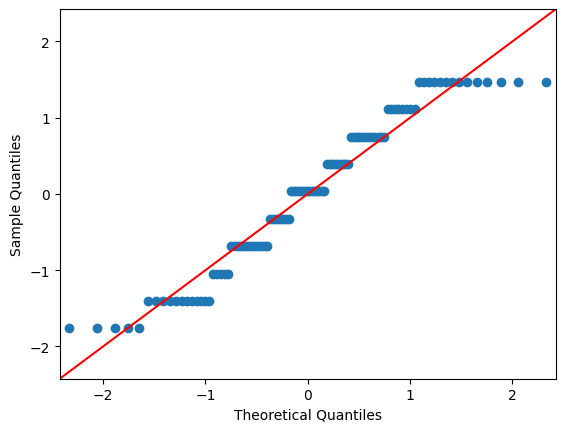

In [47]:
sm.qqplot(inputs_a,line='45',fit=True,dist=stats.norm)
plt.show()

<AxesSubplot:xlabel='input_a', ylabel='count'>

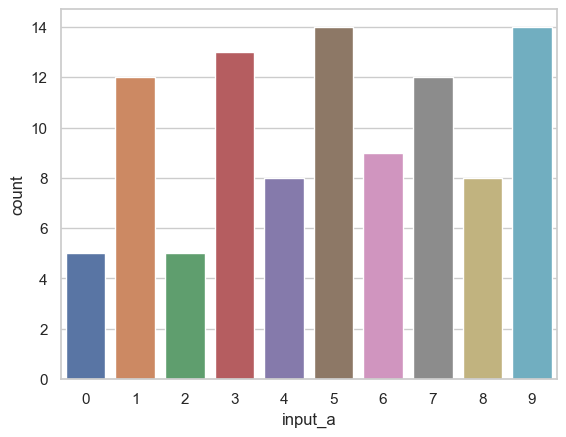

In [49]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df1_sum["input_a"])

<AxesSubplot:xlabel='input_b', ylabel='count'>

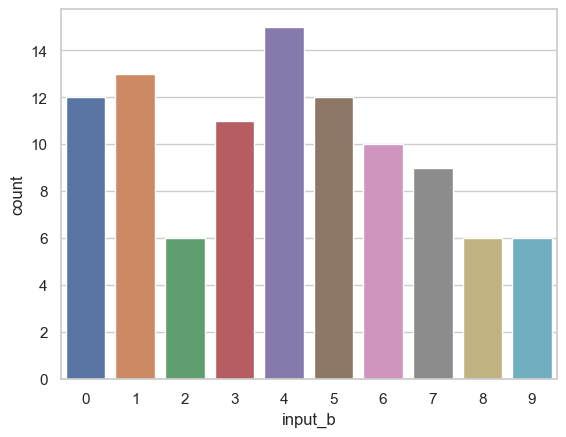

In [50]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df1_sum["input_b"])

<AxesSubplot:xlabel='constant', ylabel='count'>

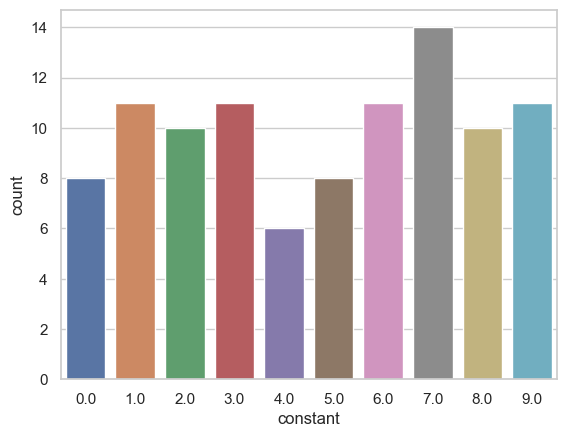

In [54]:
sns.set_theme(style='whitegrid')
sns.countplot(x=df2_sub['constant'].round())

In [55]:
inputs_a.value_counts()

9    14
5    14
3    13
7    12
1    12
6     9
4     8
8     8
2     5
0     5
Name: input_a, dtype: int64

In [56]:
inputs_b.value_counts()

4    15
1    13
0    12
5    12
3    11
6    10
7     9
2     6
8     6
9     6
Name: input_b, dtype: int64

In [57]:
df2_sub['constant'].value_counts()

7.0    14
1.0    11
3.0    11
9.0    11
6.0    11
8.0    10
2.0    10
5.0     8
0.0     8
4.0     6
Name: constant, dtype: int64

In [41]:
df1_sum

,input_a,input_b,operand,operand_str,output,MR1_input_a,MR1_input_b,MR1_output,MR1_checker,MR1_checker_str
0,3,0,0,sum,3.0,0.0,3.0,3.0,1.0,No-violated
1,7,5,0,sum,12.0,5.0,7.0,12.0,1.0,No-violated
2,7,1,0,sum,8.0,1.0,7.0,8.0,1.0,No-violated
3,4,0,0,sum,4.0,0.0,4.0,4.0,1.0,No-violated
4,1,4,0,sum,5.0,4.0,1.0,5.0,1.0,No-violated
...,...,...,...,...,...,...,...,...,...,...
95,8,7,0,sum,15.0,7.0,8.0,15.0,1.0,No-violated
96,1,9,0,sum,10.0,9.0,1.0,10.0,1.0,No-violated
97,3,1,0,sum,4.0,1.0,3.0,4.0,1.0,No-violated
98,1,4,0,sum,5.0,4.0,1.0,5.0,1.0,No-violated
